# <u>Chaîne de masse-ressort<u>

On considère une chaîne de  $N+2$ masses  $m$ numérotées de  0 à  $N+1$ et reliées entre elles par des ressorts de raideur  $k$ . Les masses  0 et  $N+1$ sont maintenues fixes et on applique une force  $F\cos(\omega t)$, qui varie sinusoidalement en fonction du temps  $t$, sur la masse $N$.

Après un régime transitoire, le déplacement de la masse $n$  par rapport à sa position d'équilibre est:  $An\cos(\omega t)$ où  $A_n$ est un réel positif ou négatif. Ainsi, les déplacements des masses sont synchronisées, mais chaque déplacement a une amplitude $A_n$ différente. Ce deplacement peut même s'inverser (en opposition de phase) lorsque l'amplitude  $A_n$ est négative.

Les amplitudes  $A_n$ des déplacements de chaque masse vérifient la relation de récurrence:  $A_0 = 0$,  $A_{n+1} = 0$, $-m\omega^2 A_n = k (A_{n+1}+A_{n-1}-2A_n)$ pour  $n$ de 1 à  $N-1$ et  $-m\omega^2A_N=k(A_{N-1}-2A_N)+F$.

Pour résoudre le problème numériquement, on utilise $\omega = \sqrt{\frac{k}{m}}$ comme unité pour les pulsations,  $A= \frac{F}{k}$ comme unité pour les amplitudes et on pose  $A_n=Au_n$ et  $u_1=1$. On en déduit que la suite d'éléments  $u_n$ a pour relation de récurrence

$u_0=0$   ,   $u_1=1$   ,   $$u_n=(2-\omega^2)u_{n-1}-u_{n-2}$$   
 
avec le facteur  $A$ donné par $$A=\frac{1}{(2-\omega^2)u_N- u_{N-1}}$$.

### <u>Partie 1<u>

Dans cette partie nous allons montrer que le système masse-ressort présente un phénomène de résonance pour certaines valeurs de la pulstation  $\omega_r$ de kla force d'excitation $F$.

In [1]:
import numpy as np

# Initialmisation des termes de la suite

N = 1000
u0 = 0 
u1 = 0 
omega = (np.pi)/N

# Définition de la suite 

def f(n):
    return ((2-omega*omega)*n-n-1)



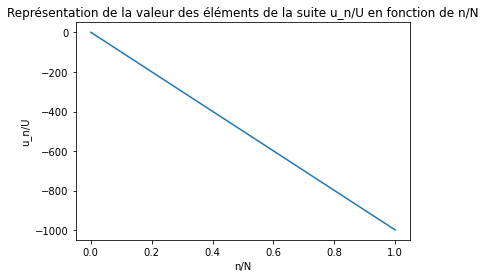

In [2]:
import matplotlib.pyplot as plt 

x = np.linspace(0, N, 1000000)
U = f(0)                               # U est la plus grande valeur de la suite et correspond au premier terme
f2_x = f(x)/U                          # suite u_n/U
f3_x = x/N                             # rapport n/N


# On nomme les axes et le graphique puis on le trace
plt.xlabel('n/N')
plt.ylabel('u_n/U')
plt.title('Représentation de la valeur des éléments de la suite u_n/U en fonction de n/N')

plt.plot(f3_x, f2_x)

La suite u_n/U tend vers 1 ce qui est attendu.

/tmp/ipykernel_6225/560136700.py:16: RuntimeWarning: divide by zero encountered in divide
  return ( np.fabs(1/((2-omega_2**2)*f2(x)-f2(x-1) )))


Text(0, 0.5, 'Valeur absolue de A')

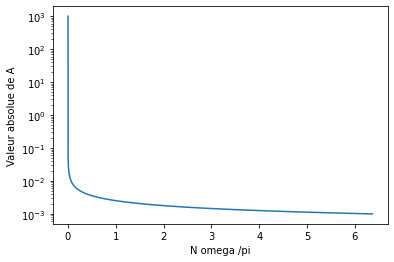

In [3]:
# Initialisation de la nouvelle valeur de la pulsation omega

omega_2 = np.linspace(0, 20/N, 1000000)


# On redefinit la suite pour la nouvelle valeur de omega

def f2(n):                                    
    return( (2-omega_2*omega_2)*n-n-1)



# On definit la valeur obsolue du facteur A

def A(x):
        return ( np.fabs(1/((2-omega_2**2)*f2(x)-f2(x-1) )))


    
# On définit le paramètre N omega/pi


P = (x * omega_2)/np.pi

# On trace A en fonction de N omega/pi

plt.semilogy(P, A(x))
plt.xlabel('N omega /pi')
plt.ylabel('Valeur absolue de A')

Nous n'obtenons pas le résultat attendu qui est celui-ci : 

![Graphique attendu](https://moodle-sciences-23.sorbonne-universite.fr/pluginfile.php/277068/mod_assign/introattachment/0/output.png?forcedownload=1)

Nous pouvons en déduire que les valeurs de pulsation de résonnance sont constantes.

Plus le nombre de valeurs pour omega va croître plus les oscillations se feront avec une période courte, à l'inverse plus le nombre de valeurs d'omega va décroître plus les oscillations auront une période plus longue.

/tmp/ipykernel_6225/2423661308.py:17: RuntimeWarning: divide by zero encountered in divide
  return ( np.fabs(1/((2-omega__2**2)*f3(x1)-f3(x1-1) )))


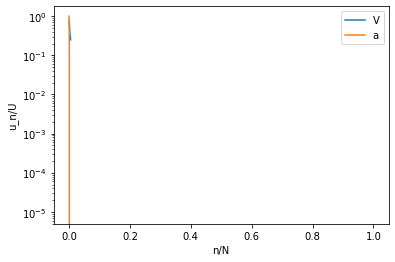

In [4]:
# On selectionne seulement les 4 premières valeurs de la pulstaion de réonnance 

omega__2 = x[1:5]

# On redefinit le nombre de valeurs sélectionnés

x1 = np.linspace(0, 4, 4)

# On redéfinit la suite u_n/U, le paramètre N omega /pi et le facteur A avec le nouveau x1

def f3(n):                                    
    return( (2-omega__2*omega__2)*n-n-1)

P1 = (x1 * omega__2)/np.pi

def A1(x):
        return ( np.fabs(1/((2-omega__2**2)*f3(x1)-f3(x1-1) )))

# On nomme les axes et le graphiquye et on le  trace     
    
plt.semilogy(P1, A1(x1))
plt.plot(f3_x, f2_x)
plt.xlabel('n/N')
plt.ylabel('u_n/U')
plt.legend('Valeurs des éléments de u_n/U en fonction de n/N et valeur absolue de A en fonction de N omega/pi')
plt.show()

On observe que ce n'est pas le bon résultat.